# Libraries

In [1]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import webbrowser
import sparql_dataframe
from SPARQLWrapper import SPARQLWrapper, JSON
sparql = SPARQLWrapper("http://localhost:8080/sparql")

warnings.filterwarnings('ignore')


In [2]:
endpoint = "http://localhost:8080/sparql"

# Queries

## Anime recommendation

###  Based on genre and score

In [3]:
genre = input('Enter your favorite genre:')
genre = '"' + genre + '"'
score = input('Score?:')

q1 = """
PREFIX : <http://www.semanticweb.org/hosna/ontologies/2023/1/untitled-ontology-70#>

SELECT ?anime_name ?anime_link
WHERE {
	?A a :anime;
       :anime_name ?anime_name;
	   :Of_genre ?G.
    ?G :genre_1 ?G1 ; :genre_2 ?G2.
    FILTER (?G1 = """+genre+""" || ?G2 = """+genre+""" )
  	?A :Has_popularity_of ?P.
  	?P :po_score ?po_score.
    FILTER(?po_score > """+score+""").
  	?A :Its_link_is ?l.
  	?l :anime_link ?anime_link
} 
ORDER BY DESC (?po_score)
LIMIT 10
"""

df1 = sparql_dataframe.get(endpoint, q1)

open_link = input('Would you like to open MyAnimeList of the anime?')
if open_link == 'yes':
    webbrowser.open(df1['anime_link'][0])

### Most watched anime

In [ ]:
q2 = """
PREFIX : <http://www.semanticweb.org/hosna/ontologies/2023/1/untitled-ontology-70#>

SELECT ?anime_name
WHERE {
	?A a :anime;
       :anime_name ?anime_name;
  	   :Has_popularity_of ?P.
    ?P :Has_ws_of ?ws.
  ?ws :watching ?watching ; :completed ?completed.
} 
ORDER BY DESC (?watching)(?completed)
LIMIT 50
"""
df2 = sparql_dataframe.get(endpoint, q2)
df2

### Anime for children

In [ ]:
age = int(input('How old is your child?'))

if age < 6:
    restriction = '"g"'
elif age>=5 & age<=12:
    restriction = '"pg"'

q3 = """ 

PREFIX : <http://www.semanticweb.org/hosna/ontologies/2023/1/untitled-ontology-70#>

SELECT ?anime_name
WHERE {
	?AM a :anime_movie;
         :anime_name ?anime_name.
  	?A a :anime ; :anime_name ?anime_name ; :anime_type ?anime_type.
    ?A :Is_suitable_for ?PG.
    ?PG :pg_age_restriction """+restriction+""".
    ?A :Has_popularity_of ?popularity.
  	?popularity :po_score ?score.
} 
ORDER BY DESC (?score)

 """

df3 = sparql_dataframe.get(endpoint, q3)

In [ ]:
df3.head(2)

## Data Analysis

### Most reviewed

In [ ]:

q4 = """
PREFIX : <http://www.semanticweb.org/hosna/ontologies/2023/1/untitled-ontology-70#>

SELECT (?an AS ?anime_name) (COUNT (?an) as ?anime_count) ?IL
WHERE {
  ?R a :review ; :Written_about ?l.
  ?l :anime_link ?al ; :image_link ?IL.
  ?l :Link_of ?A.
  ?A :anime_name ?an
} 
GROUP BY ?an ?IL
ORDER BY DESC (COUNT (?an))
LIMIT 100
"""
df4 = sparql_dataframe.get(endpoint, q4)

### Most reviewed genre in each year

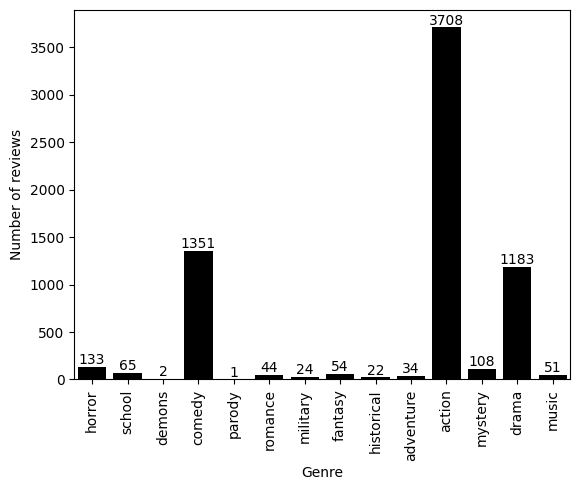

In [4]:
year = input('The year?')
q5 = """
PREFIX : <http://www.semanticweb.org/hosna/ontologies/2023/1/untitled-ontology-70#>

SELECT ?year (?G1 AS ?first_genre) (COUNT (?G1) as ?num_of_reviews)
WHERE {
  ?R a :review ; :Written_about ?l.
  ?l :anime_link ?al ; :image_link ?IL.
  ?l :Link_of ?A.
  ?A :anime_name ?an.
  ?A :Of_genre ?G.
  ?G :genre_1 ?G1 ; :genre_2 ?G2 ; :genre_3 ?G3.
  ?A :Aired_at ?D.
  ?D :year_ ?year.
  FILTER(?year = """+year+""").
} 
GROUP BY ?year ?G1
LIMIT 100
"""
df5 = sparql_dataframe.get(endpoint, q5)

ax = sns.barplot(x='first_genre', y='num_of_reviews', data=df5,color='black')

plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Genre', ylabel='Number of reviews')
plt.show()